In [3]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request
import math

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Jesús Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [4]:
#Creamos un array con los valores de x que vamos a interpolar

puntos = np.array([0, np.pi/2 , np.pi])

y = np.sin(puntos)

lagrange(puntos,y)


f = lambda x: sp.sin(x)

print(len(puntos))

3


In [5]:
def error_Hermite(puntos, f, e, x):
    ''' 
    Esta función calcula el error de el polinomio de Hermite

    Entrada:
    puntos= Puntos de interpolación
    f = función original
    e = algun valor dentro del intervalo de interpolación
    x = Punto en donde se desea calcular el error
    Salida
    error del polinomio de Hermite
    '''
    if max(puntos) < e or min(puntos)> e:
        raise ValueError('El numero dado para calcular el error no se encuentra dentro del intervalo de interpolación')
        
    #Definimos la varible en sympy

    t = sp.symbols('t')

    f = f(t)

    #Calculamos la derivada de grado 2n+2 de la funcion
    n_2 = 2*len(puntos) + 2
    
    df = sp.diff(f, t ,n_2)
    
    df = sp.lambdify(t,df)

    df_e = df(e)

    #Calculamos la expresión de factorial

    fact = 1 / math.factorial(n_2)

    product = 1
    
    #Calculamos la productoria
    for i in puntos:
        termino = (x - i)**2
        product*= termino
        
    error = fact * df_e * product
    return float(abs(error))

In [6]:
error_Hermite(puntos, f , e = 1, x= 1.5)

In [7]:
def error_lagrange(puntos, f, e, x):
    ''' 
    Esta función calcula el error de el polinomio de lagrange

    Entrada:
    puntos= Puntos de interpolación
    f = función original
    e = algun valor dentro del intervalo de interpolación
    x = Punto en donde se desea calcular el error
    Salida
    error del polinomio de lagrange
    '''
    if max(puntos) < e or min(puntos)> e:
        raise ValueError('El numero dado para calcular el error no se encuentra dentro del intervalo de interpolación')
        
    #Definimos la varible en sympy

    t = sp.symbols('t')

    f = f(t)

    #Calculamos la derivada de grado n+1 de la funcion
    n_1 = len(puntos) + 1
    df = sp.diff(f, t ,n_1)
    df = sp.lambdify(t,df)

    df_e = df(e)

    #Calculamos la expresión de factorial

    fact = 1 / math.factorial(n_1)

    product = 1
    
    for i in puntos:
        termino = x - i
        product*= termino
        
    error = fact * df_e * product
    return float(abs(error))

In [8]:
error_lagrange(puntos, f , e = 1, x= 1.5)

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [9]:
def  sigma_original(E, sigma0): #Definimos la función original
    Er, T = 78,55
    #Calculamos sigma reemplazando valores de la tabla

    return sigma0/((E -Er)**2 + (T**2 /4)) 


In [10]:
#Importamos los arrays de los puntos que se van a interpolar
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

#Usando sympy calculamos la derivada de la función
Er, T = 78,55

E = sp.symbols('E')
#Calculamos sigma reemplazando valores de la tabla
sigma0 = 83.5 *((75 - Er)**2 + (T**2 /4))

f = sigma0/((E -Er)**2 + (T**2 /4))
df = sp.diff(f, E)

df = sp.lambdify(E, df)

In [11]:
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P
     


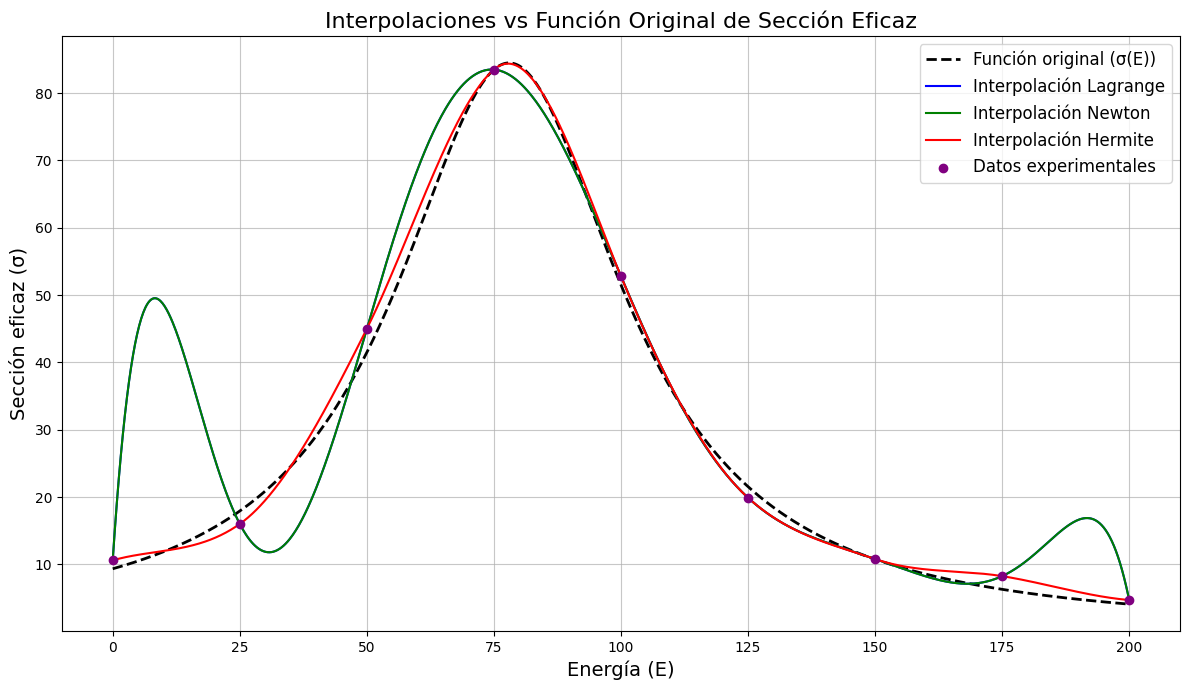

In [12]:


Energia_interp = np.linspace(0,200,1000)


#Calculo de los polinomios
pol_lagrange = lagrange(Energia, sigma_exp)
pol_newton = Polinomio_Newton(Energia, sigma_exp)
pol_Hermite = CubicHermiteSpline(Energia, sigma_exp, df(Energia))

# Evaluación
sigma_original = sigma_original(Energia_interp,sigma0)
sigma_lagrange = pol_lagrange(Energia_interp)
sigma_newton = pol_newton(Energia_interp)
sigma_hermite = pol_Hermite(Energia_interp)

#Grafico
plt.figure(figsize=(12, 7))
plt.plot(Energia_interp, sigma_original, label='Función original (σ(E))', color='black', linestyle='--', linewidth=2)
plt.plot(Energia_interp, sigma_lagrange, label='Interpolación Lagrange', color='blue')
plt.plot(Energia_interp, sigma_newton, label='Interpolación Newton', color='green')
plt.plot(Energia_interp, sigma_hermite, label='Interpolación Hermite', color='red')
plt.scatter(Energia, sigma_exp, color='purple', label='Datos experimentales', zorder=5)

plt.title('Interpolaciones vs Función Original de Sección Eficaz', fontsize=16)
plt.xlabel('Energía (E)', fontsize=14)
plt.ylabel('Sección eficaz (σ)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

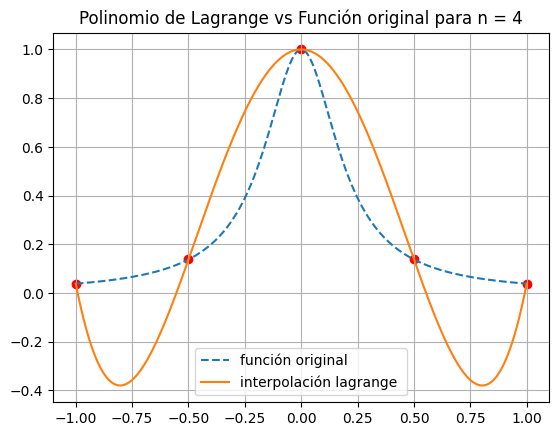

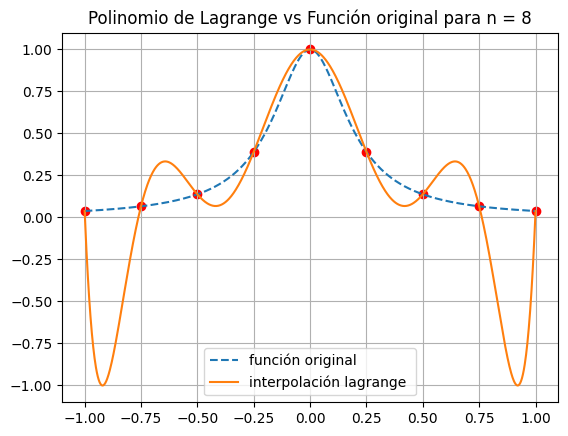

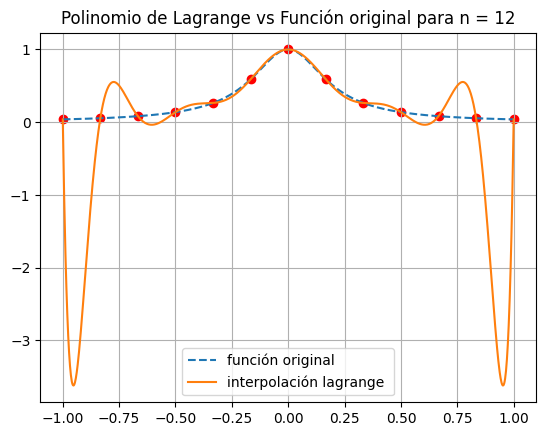

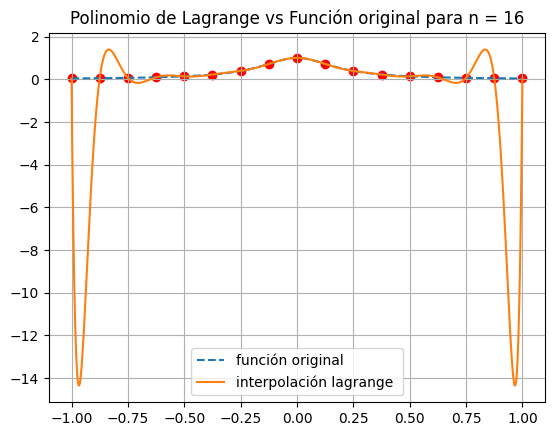

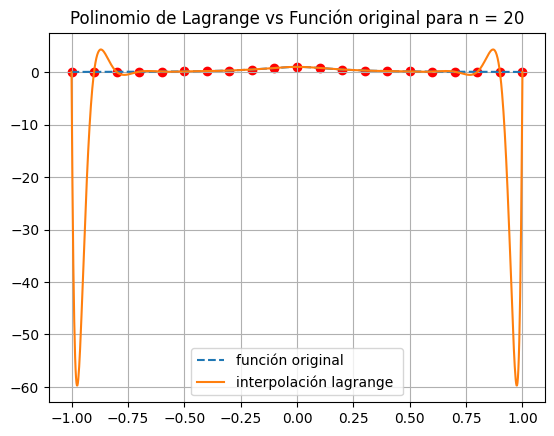

In [17]:
#Fución original
f = lambda x : 1/ (1 + 25 * x**2)

#Lista con los valores de N
N = [4, 8, 12, 16, 20]
x = np.linspace(-1 ,1 ,1000)

# Iterar sobre distintos valores de n
for n in N:

    #Puntos de interpolación
    x_inter = np.linspace(-1, 1, n+1)
    y = f(x_inter)
    #Calculo del polinomio de Lagrange
    Polinomio = lagrange(x_inter, y)
    #Grafica para cada valor de n
    plt.title(f'Polinomio de Lagrange vs Función original para n = {n}')
    plt.plot(x,f(x), linestyle = '--',label = 'función original ')
    plt.plot(x, Polinomio(x), label = 'interpolación lagrange ')
    plt.scatter(x_inter, y, color='red')
    plt.legend()
    plt.grid()
    plt.show()


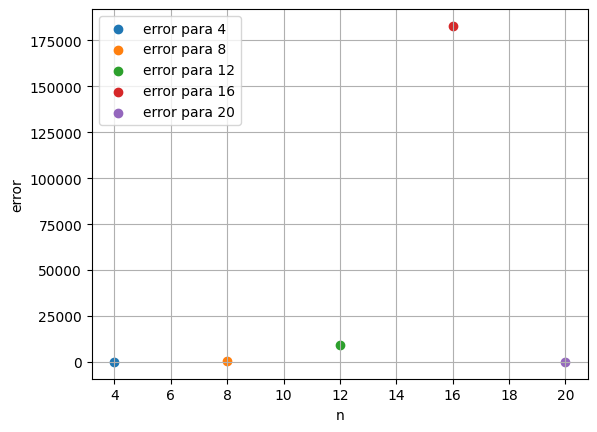

In [18]:
f = lambda x : 1/ (1 + 25 * x**2)

for n in N:
    
    x_inter = np.linspace(-1, 1, n+1)
    error = error_lagrange(x_inter, f, e = 0.2, x= 0.8)
    plt.scatter(n,error, label = f'error para {n}')
    
    plt.legend()

plt.xlabel('n')
plt.ylabel('error')
plt.grid()
plt.show()

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

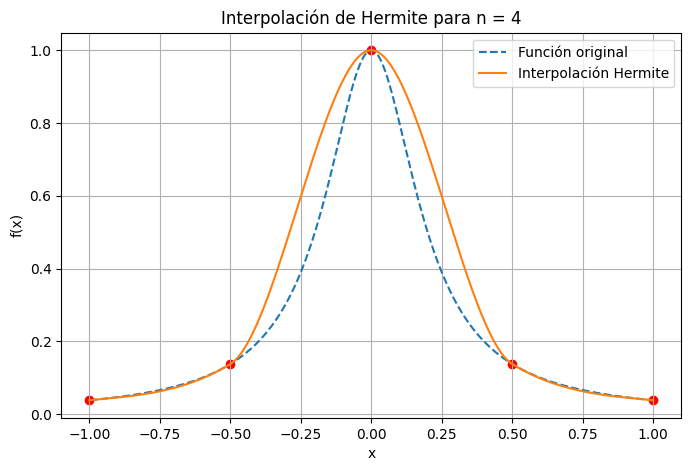

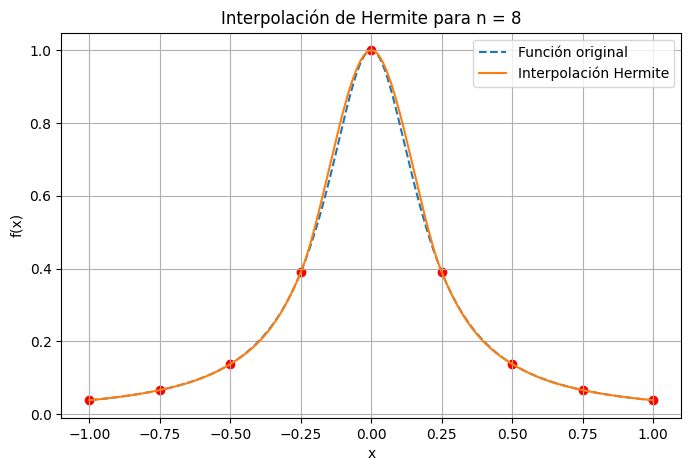

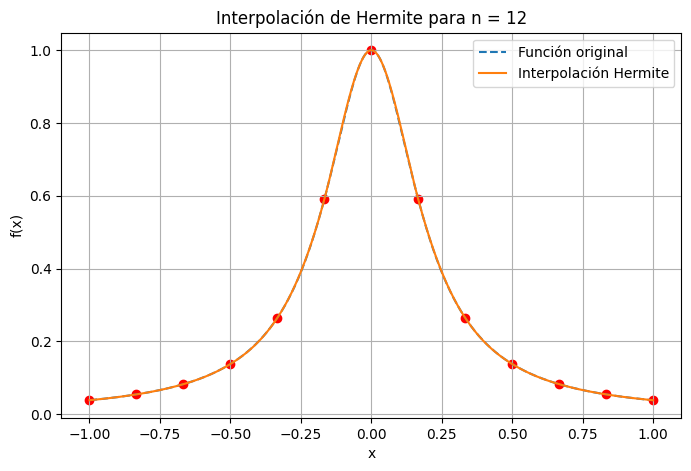

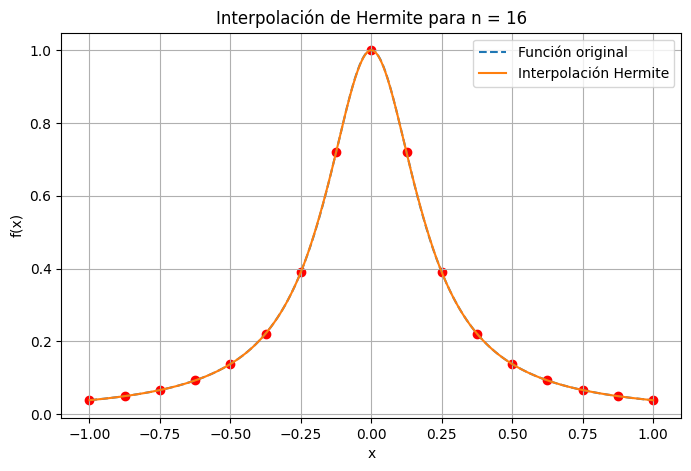

In [19]:

# Definición simbólica
x_sym = sp.symbols('x')
f_expr = 1 / (1 + 25 * x_sym**2)

# Derivada simbólica con respecto a x
df_expr = sp.diff(f_expr, x_sym)

# Funciones evaluables numéricamente
f = sp.lambdify(x_sym, f_expr)
df = sp.lambdify(x_sym, df_expr)

# Valores de n para probar
N = [4, 8, 12, 16]

# Dominio para graficar
x = np.linspace(-1, 1, 1000)

# Iterar sobre distintos valores de n
for n in N:
    #Puntos de interpolacion
    x_inter = np.linspace(-1, 1, n + 1)
    y = f(x_inter)
    dydx = df(x_inter)
    
    # Interpolación de Hermite
    pol_Hermite = CubicHermiteSpline(x_inter, y, dydx)

    #Grafica apara cada valor de n
    plt.figure(figsize=(8, 5))
    plt.title(f'Interpolación de Hermite para n = {n}')
    plt.plot(x, f(x), '--', label='Función original')
    plt.plot(x, pol_Hermite(x), label='Interpolación Hermite')
    plt.scatter(x_inter, y, color='red')
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()



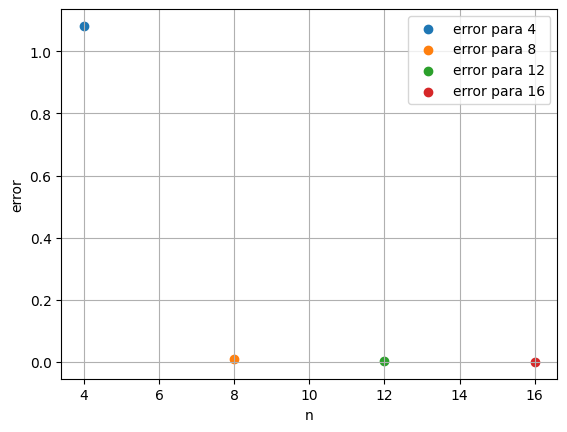

In [20]:
f = lambda x : 1/ (1 + 25 * x**2)
for n in N:
    
    x_inter = np.linspace(-1, 1, n+1)

    error = error_Hermite(x_inter, f, e = 0.5, x= 0.22)
    
    plt.scatter(n,error, label = f'error para {n}')
    plt.legend()

plt.xlabel('n')
plt.ylabel('error')
plt.grid()
plt.show()

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

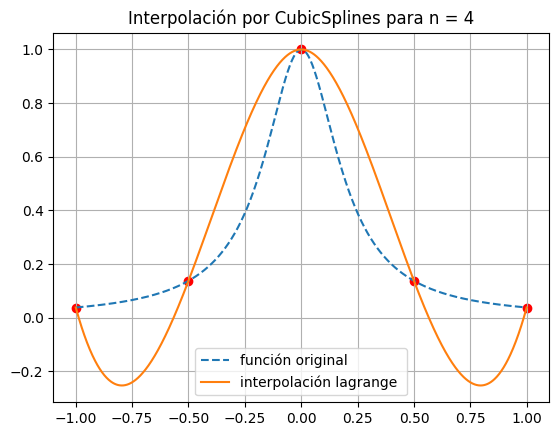

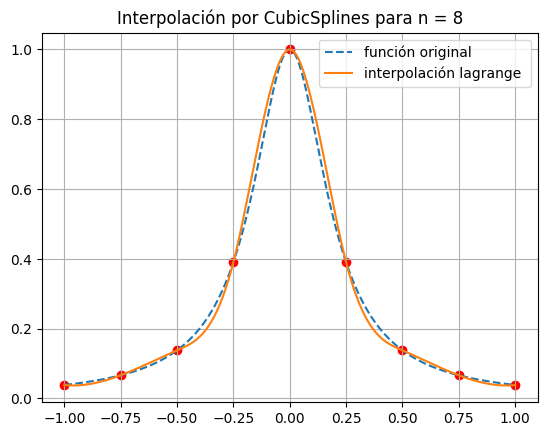

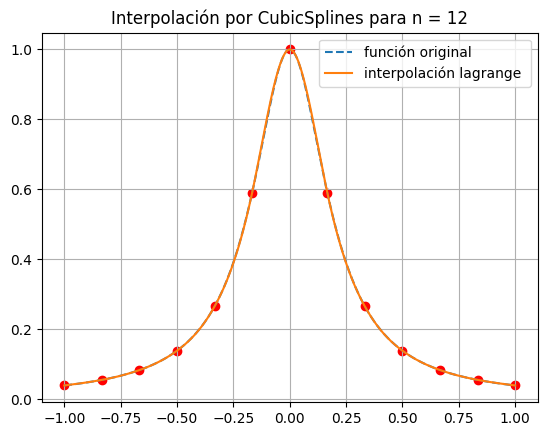

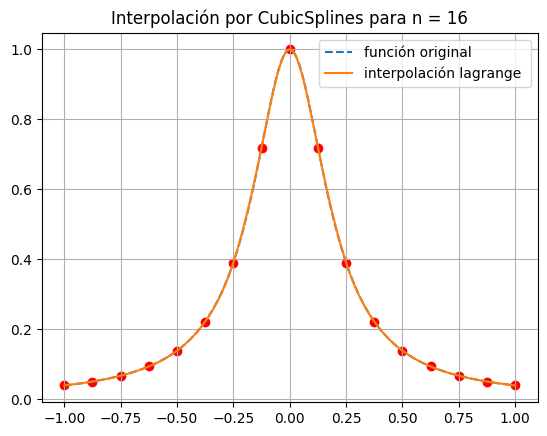

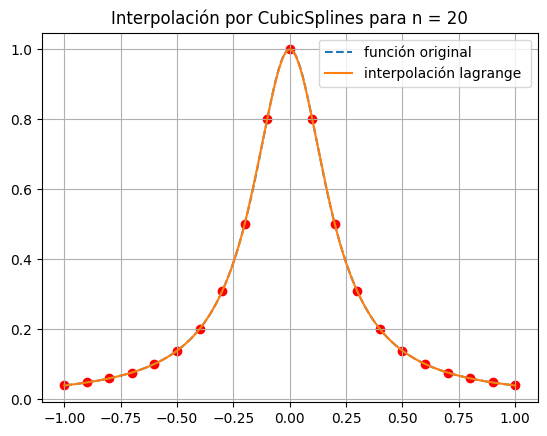

In [21]:
#Fución original
f = lambda x : 1/ (1 + 25 * x**2)

#Lista con los valores de N
N = [4, 8, 12, 16, 20]
x = np.linspace(-1 ,1 ,1000)

# Iterar sobre distintos valores de n
for n in N:

    #Puntos de interpolación
    x_inter = np.linspace(-1, 1, n+1)
    y = f(x_inter)
    #Calculo de los polinomios de CubicSplines
    Polinomio = CubicSpline(x_inter, y)
    #Grafica para cada valor de n
    plt.title(f'Interpolación por CubicSplines para n = {n}')
    plt.plot(x,f(x), linestyle = '--',label = 'función original ')
    plt.plot(x, Polinomio(x), label = 'interpolación lagrange ')
    plt.scatter(x_inter, y, color='red')
    plt.legend()
    plt.grid()
    plt.show()

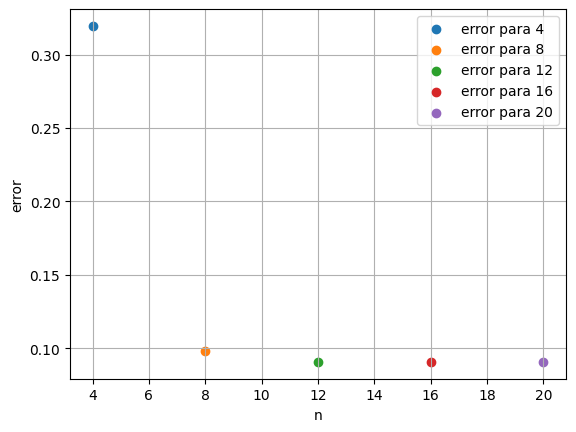

In [22]:
#Error para cubic spline
f = lambda x : 1/ (1 + 25 * x**2)
for n in N:
    
    x_inter = np.linspace(-1, 1, n+1)
    y = f(x_inter)
    
    pol_cubicspline = CubicSpline(x_inter, y)
    error = abs(f(0.5) - pol_cubicspline(0.9))
    
    plt.scatter(n,error, label = f'error para {n}')
    plt.legend()

plt.xlabel('n')
plt.ylabel('error')
plt.grid()
plt.show()

El metodo de Hermite y cubicspline son los mas adecuados para la representación de la función, ya que ambos se adaptan a la función 
con casi las mismas iteraciones representando un error mas bajo a medida que aumentamos los puntos. Contrario al metodo de Lagrange que a mayor numero de puntos la aproximación es mas caotica.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

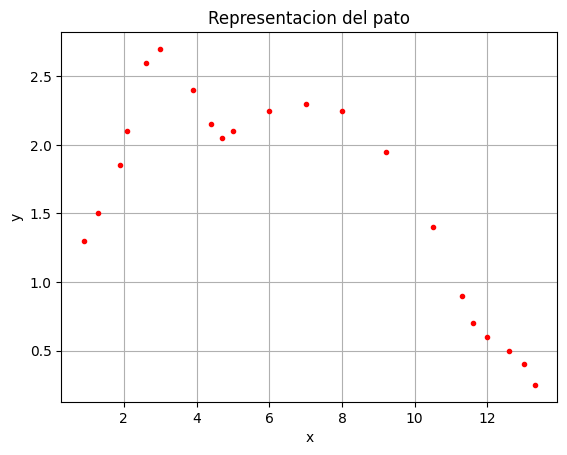

In [23]:
#pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
#urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
#imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
#plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

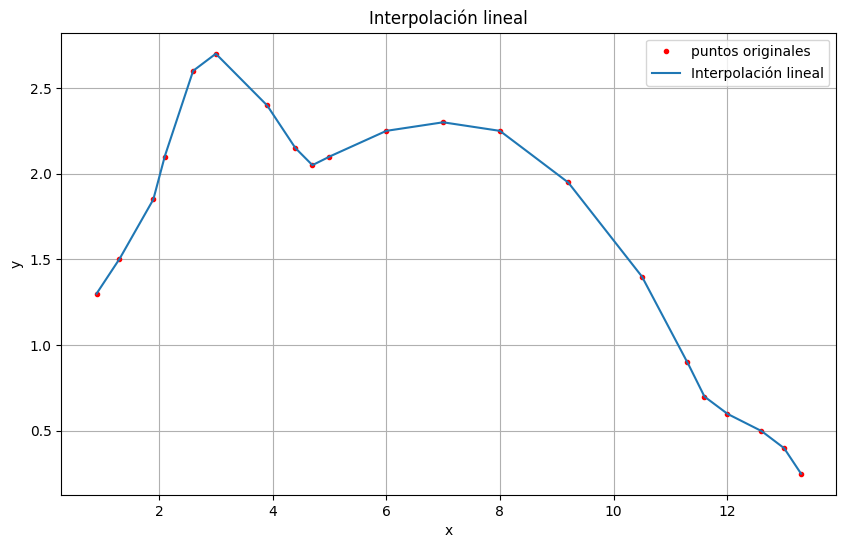

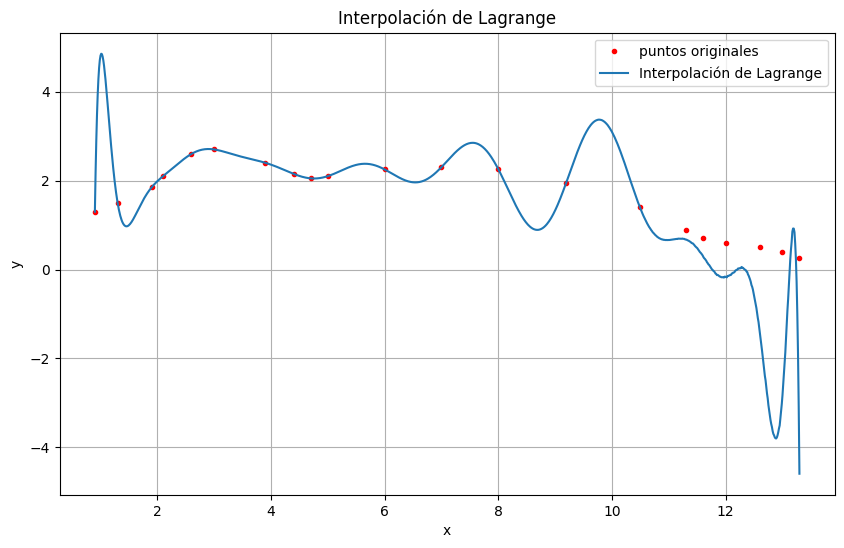

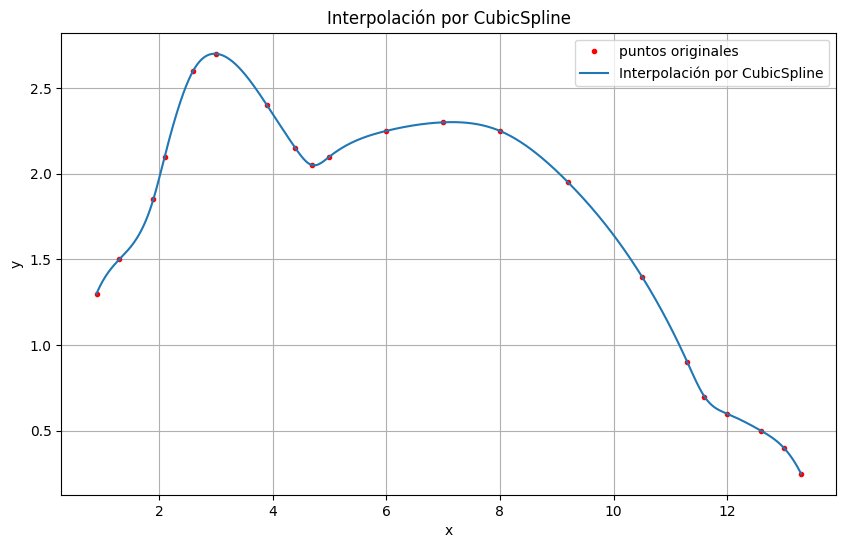

In [24]:

# Interpolaciones
pol_lineal = interp1d(xp, yp)
pol_lagrange = lagrange(xp, yp)
pol_cubicspline = CubicSpline(xp, yp)

x = np.linspace(min(xp), max(xp), 1000)

# Gráfico Interpolación lineal
plt.figure(figsize=(10, 6))
plt.title('Interpolación lineal')
#plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='puntos originales')
plt.plot(x, pol_lineal(x), label='Interpolación lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Gráfico Interpolación de Lagrange
plt.figure(figsize=(10, 6))
plt.title('Interpolación de Lagrange')
#plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='puntos originales')
plt.plot(x, pol_lagrange(x), label='Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Gráfico Interpolación por CubicSpline
plt.figure(figsize=(10, 6))
plt.title('Interpolación por CubicSpline')
#plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='puntos originales')
plt.plot(x, pol_cubicspline(x), label='Interpolación por CubicSpline')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Las Graficas muestran que la mejor aproximación es la de Cubic Spline, la de Lagrange presenta demasiadas oscilaciones y la lineal no se acomoda muy bien a la forma del pato

# 5


Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [25]:
#Encontramos los coeficientes de los polinomios cubic resolviendo la matriz asociada al metodo

A = np.array([                #columnas b0,d0,b1,c1,d1,b2,d2
    [1, 1, 0, 0, 0, 0 ,0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, -2],
    [1, 3, -1, 0, 0, 0, 0],
    [0, 0, 1, 2, 3, -1, 0],
    [0, 6, 0, -2, 0, 0, 0],
    [0, 0, 0 ,2, 6, 0, 6]
])
B = np.array([-2, 0, 1, 0, 0, 0, 0])


In [26]:
from numpy.linalg import solve

b0,d0,b1,c1,d1,b2,d2 = solve(A, B)

a0 = 5.0
a1 = 3.0
a2 = 3.0
c0 = 0.0
c2 = -3* d2


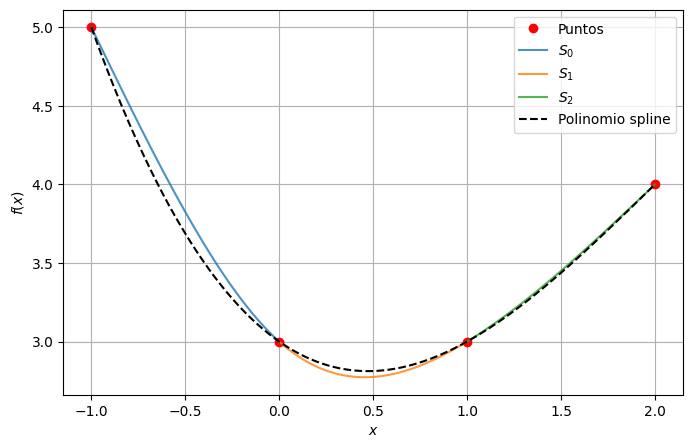

In [27]:
#Importamos los puntos de interpolación
x_points = np.array([-1, 0, 1, 2])
y_points = np.array([5, 3, 3, 4])


x0, x1, x2 = x_points[0], x_points[1], x_points[2]

#Usando sympy calculamos los polinomios simplificados
x = sp.symbols('x')
#Polinomios
S0_expr = a0 + b0*(x - x0) + c0*(x - x0)**2 + d0*(x - x0)**3
S1_expr = a1 + b1*(x - x1) + c1*(x - x1)**2 + d1*(x - x1)**3
S2_expr = a2 + b2*(x - x2) + c2*(x - x2)**2 + d2*(x - x2)**3

#Simplificación y conversión a funcion
S0 = sp.lambdify(x, sp.expand(S0_expr))
S1 = sp.lambdify(x, sp.expand(S1_expr))
S2 = sp.lambdify(x, sp.expand(S2_expr))

#Creamos arrays con puntos de interpolacion
x_0 = np.linspace(x_points[0], x_points[1], 100)
x_1 = np.linspace(x_points[1], x_points[2], 100)
x_2 = np.linspace(x_points[2], x_points[3], 100)
x_inter = np.linspace(x_points[0], x_points[3], 300)

#Calculamos los polinomios de interpolacion usando la libreria
Pol_cubic = CubicSpline(x_points, y_points)

#Graficamos la comparacion del metodo manual con el de la libreria
plt.figure(figsize=(8, 5))
plt.plot(x_points, y_points, 'ro', label='Puntos')
plt.plot(x_0, S0(x_0), label='$S_0$', alpha=0.8)
plt.plot(x_1, S1(x_1), label='$S_1$', alpha=0.8)
plt.plot(x_2, S2(x_2), label='$S_2$', alpha=0.8)
plt.plot(x_inter, Pol_cubic(x_inter), '--', label='Polinomio spline', color='black')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()